# Ford GoBike System Data
## by Lama

## Preliminary Wrangling

This document explores a dataset containing approximately 520000 of Ford's bike sharing rides' details.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load the dataset into a pandas dataframe
bikes = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape
print (bikes.shape)

(519700, 15)


In [4]:
bikes.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
dtype: object

In [5]:
bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [6]:
# Drop all columns except the ones that will be used, to help in having faster processing of the data
bikes.drop(bikes.columns.difference(['user_type','member_birth_year','member_gender']), 1, inplace=True)

In [7]:
bikes.head()

,user_type,member_birth_year,member_gender
0,Customer,1987.0,Male
1,Customer,1965.0,Female
2,Customer,NaN,NaN
3,Customer,NaN,NaN
4,Subscriber,1997.0,Female


### What is the structure of your dataset?

The dataset has information about 519700 rides made in a bike-sharing system with 14 columns that has further information about the ride details. The data types for the variables vary, some are floats, integers, datetime, or objects.


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in finding the most common characteristics of those who use this bike-sharing system. 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The user type, gender, and age.

## Univariate Exploration

I'll start by looking at the counts and percentages of the member's genders.

In [8]:
# To check the number of NaN in the member_gender column
bikes.member_gender.isna().sum()

66462

In [9]:
# Drop rows that have gender values other than male and female
bikes.drop(bikes[(bikes['member_gender'] != 'Male') &  (bikes['member_gender'] != 'Female')].index, inplace = True) 

In [10]:
# NaNs have been removed
bikes.member_gender.isna().sum()

0

In [11]:
# To check that the remaining rows in member_gender are correct
bikes.member_gender.value_counts()

Male      348318
Female     98621
Name: member_gender, dtype: int64

In [12]:
base_color = sb.color_palette()[0]

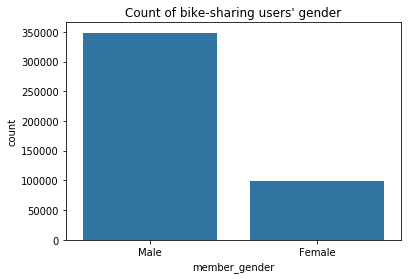

In [13]:
sb.countplot(data = bikes, x = 'member_gender', color = base_color);
plt.title("Count of bike-sharing users' gender");

It can be seen from the count plot above that the majority of the members are males. The number of males is around 350000 and females is 100000

In [14]:
gender_counts = bikes['member_gender'].value_counts()

In [15]:
n_users = bikes.shape[0]
max_user_count = gender_counts[0]
max_prop = max_user_count / n_users
max_prop

0.7793412523856723

In [16]:
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

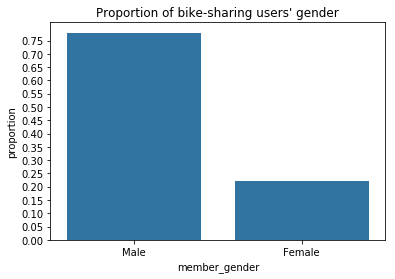

In [17]:
sb.countplot(data = bikes, x = 'member_gender', color = base_color);
plt.yticks(tick_props * n_users, tick_names)
plt.ylabel('proportion');
plt.title("Proportion of bike-sharing users' gender");

The count plot above has been plotted in terms of relative frequency on a bar chart. It can be seen that the male members make up around 78% of the data, and females around 22%

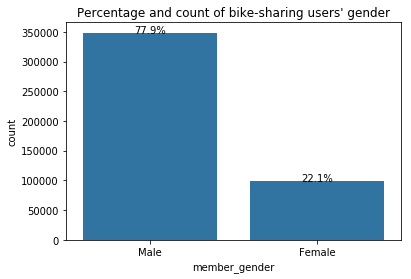

In [18]:
sb.countplot(data = bikes, x = 'member_gender', color = base_color);

locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = gender_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_users)
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black');

plt.title("Percentage and count of bike-sharing users' gender");

The plot above shows both the count of each member gender that is in the dataset, as well as their percentages all in one plot.

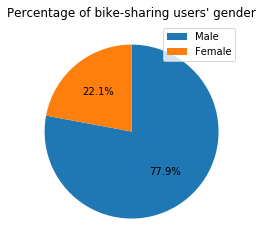

In [19]:
plt.pie(gender_counts, autopct='%.1f%%', startangle = 90, counterclock = False);
plt.legend(gender_counts.index);
plt.title("Percentage of bike-sharing users' gender");

The color-coded pie chart above shows only the percentage. It's clear that the blue slice which represents the percentage of male members takes up most of the chart with a percentage of 77.9%. The remaining is the percentage of females.

In [20]:
def percentage_blocks(df, var):

    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts

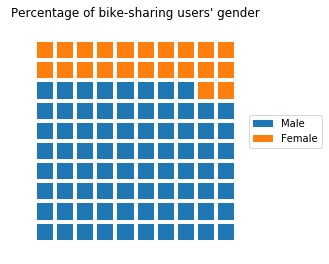

In [21]:
waffle_counts = percentage_blocks(bikes, 'member_gender')

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[cat]

# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
plt.axis('off');
plt.axis('square');

plt.title("Percentage of bike-sharing users' gender");

The waffle plot is an alternative for the pie plot. The downside of it compared to the pie plot is that it doesn't show the fractional part of a decimal number, as well as not showing a clear percentage from first glance.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There was no need to do any transformations to the data, because the member's gender takes on two values only. The percentage of males was a lot higher than the percentage of females.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Rows which have values in the member's gender that do not equal male or female were removed to be able to move forward with the analysis. 

## Bivariate Exploration

In this section, I will investigate if there is a relationship between the member's age and gender.

In [22]:
# Check the number of NaNs in the member birth year column
bikes.member_birth_year.isna().sum()

79

In [23]:
# Drop the NaNs
bikes.dropna(subset=['member_birth_year'], inplace = True)

In [24]:
# NaNs have been dropped
bikes.member_birth_year.isna().sum()

0

In [25]:
# source: https://github.com/chelseymarie6/Communicate-Data-Findings/blob/master/CommunicateData.ipynb
# To find the member's current age, subtract the values in the member birth year from 2019
bikes['member_age'] = 2019 - bikes['member_birth_year']

In [26]:
# Changed the member birth year and age to integers
bikes["member_birth_year"] = bikes['member_birth_year'].astype('int64')
bikes["member_age"] = bikes['member_age'].astype('int64')
bikes.dtypes

user_type            object
member_birth_year     int64
member_gender        object
member_age            int64
dtype: object

In [27]:
# Check that the age column has been added and the two columns are no longer floats
bikes.head()

,user_type,member_birth_year,member_gender,member_age
0,Customer,1987,Male,32
1,Customer,1965,Female,54
4,Subscriber,1997,Female,22
6,Customer,1991,Female,28
12,Subscriber,1990,Male,29


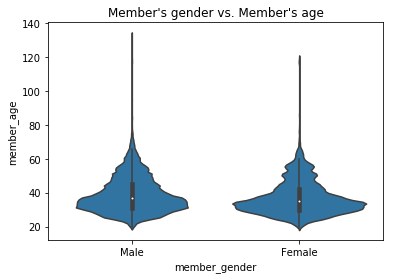

In [28]:
sb.violinplot(data = bikes, x = 'member_gender', y = 'member_age', color = base_color);
plt.title("Member's gender vs. Member's age");

The violin plot above was used to plot the realtionship between a quantitative varible (member's age), and a qualitative variable (member's gender).
The long tails in the plots for both genders suggest that there outliers at older ages. It can be seen that there are older male member's than female member's. The end of the violin plot for male memeber's age is around 135 years-old, while for females is 122 years-old.
The violin plot for male's ages is very dense around 38 years-old, and then the density starts to decrease, this could indicate that the older the member, the less they use the bike-sharing system. While the female's ages plot is very dense around 35 years-old, and then it has a bit of fluctuations as the age increases, this is almost similar to the male member's plot.

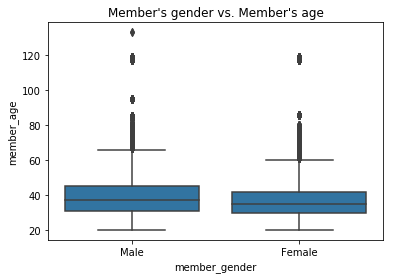

In [29]:
sb.boxplot(data = bikes, x = 'member_gender', y = 'member_age', color = base_color);
plt.title("Member's gender vs. Member's age");

To have a summarization of the data, the box plot above has been used.
The median ages for both member's genders is the same as in the violin plot before, the minimum age for both genders is 20 years-old (as shown with the lower whisker), and the maximum for male's ages is around 65 years-old, while female's is 60 years-old (as shown by the upper whisker). The points above the whiskers are outliers, which means there isn't a lot of members in that age range. As for the third quartile of male's ages, it is around 45 years-old, which means 75% of the male's ages are 45 years-old and below, as for females, it is around 40 years-old. Lastly, the first quartile of male's ages, it is around 32 years-old, which means 25% of the male's ages are 25 years-old and below, as for females, it is around 31 years-old.

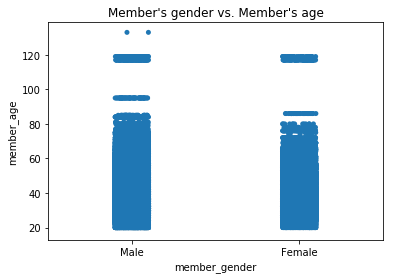

In [30]:
sb.stripplot(data = bikes, x = 'member_gender', y = 'member_age', color = base_color);
plt.title("Member's gender vs. Member's age");

A strip plot is an alternative way to visualize the data. Compared to the two plots above, the strip plot is not very clear when it comes to the data's distribution, this is due to it not having any doging or jittering to keep the points seperate.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

After exploring bot the violin plot and box plot, it seems that the majority of the member's ages regardless of their gender is within the age range of 30 to 45 years-old. After that, as age increases, the number of member's using the bike-sharing system start to decrease. The overall distribution of each gender's age seems to be almost similar.

## Multivariate Exploration

In this section, I will investigate if there is a relationship between the member's age, gender, and the user's type.

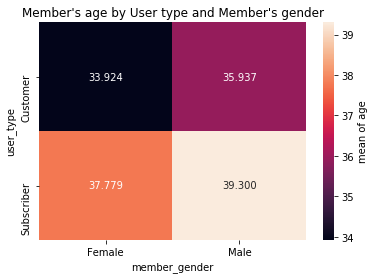

In [31]:
cat_means = bikes.groupby(['member_gender', 'user_type']).mean()['member_age']
cat_means = cat_means.reset_index(name = 'num_var2_avg')
cat_means = cat_means.pivot(index = 'user_type', columns = 'member_gender',
                            values = 'num_var2_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean of age'});

plt.title("Member's age by User type and Member's gender");

To visualize the relationship between two categorical variables (member's gender and user type) and one numeric variable (member's age), a heat map was used. It can be seen from the plot above that mean age of female members who are customers are around 34 years-old, while in the males case it is around 36 years-old. And the mean age of female members who are subscribers are around 38 years-old, while in the males case it is around 39 years-old. It seems that members who are subscribers tend to be a bit older than the customers.

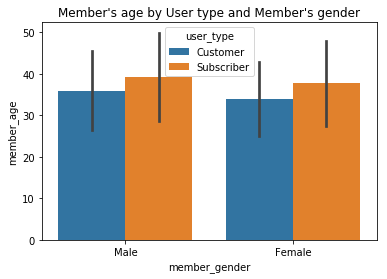

In [32]:
sb.barplot(data = bikes, x = 'member_gender', y = 'member_age', hue = 'user_type', ci = 'sd');
plt.title("Member's age by User type and Member's gender");

The bar plot for two categorical variables and one numeric variable is not very accurate for this case, it doesn't show what's the minimum age in the dataset.

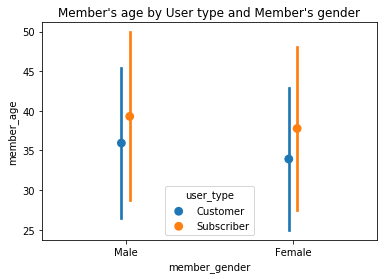

In [33]:
sb.pointplot(data = bikes, x = 'member_gender', y = 'member_age', hue = 'user_type', ci = 'sd', linestyles= "", dodge = True);
plt.title("Member's age by User type and Member's gender");

An alternative plot which can be used is the dodged point plot. The dots in the middle of the line plots shows that the results agree with the heat map above, but this plot also shows that there are large error bars due to having fewer members in the combined categories of gender and user type who are generally above 40 years-old and below 34 years-old.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

There is no relationship between a member's gender, age, and user type. The mean age of members regardless of their gender and user type seem to be around 36 years-old.


### Were there any interesting or surprising interactions between features?

I had an assumption that for both genders the mean age of subscribers would be lower due to the high costs of buying and maintaining a car, while in the customer age I assumed the mean age would be higher. But in the end it seems that there's no relationship between the three variables.